# Creating WordCloud 



A word cloud (also known as a tag cloud or WordClouds) is a graphical representation of the most used words in a text. It involves determining the number of times words are repeated, highlighting them in the representation, usually with a larger size.

In Python, word clouds can be easily created using the WordCloud library. But first, let's go through the steps involved

We load a text directly into a variable


In [1]:
text = '''The idea of eternal return is a mysterious one, and Nietzsche has often perplexed other philosophers with
it: to think that everything recurs as we once experienced it, and that the recurrence itself recurs ad
infinitum! What does this mad myth signify?
Putting it negatively, the myth of eternal return states that a life which disappears once and for all,
which does not return, is like a shadow, without weight, dead in advance, and whether it was horrible,
beautiful, or sublime, its horror, sublimity, and beauty mean nothing. We need take no more note of it than
of a war between two African kingdoms in the fourteenth century, a war that altered nothing in the destiny
of the world, even if a hundred thousand blacks perished in excruciating torment.
Will the war between two African kingdoms in the fourteenth century itself be altered if it recurs again
and again, in eternal return?'''

First, we need to split the words into tokens.

In [2]:
type(text)

str

In [5]:
text[9]

'o'

In [6]:
from nltk import RegexpTokenizer
pattern1 = r'\w+'
tokenizer = RegexpTokenizer(pattern1) #We instance our word tokenizer

tokens_text = tokenizer.tokenize(text)
print(tokens_text)


['The', 'idea', 'of', 'eternal', 'return', 'is', 'a', 'mysterious', 'one', 'and', 'Nietzsche', 'has', 'often', 'perplexed', 'other', 'philosophers', 'with', 'it', 'to', 'think', 'that', 'everything', 'recurs', 'as', 'we', 'once', 'experienced', 'it', 'and', 'that', 'the', 'recurrence', 'itself', 'recurs', 'ad', 'infinitum', 'What', 'does', 'this', 'mad', 'myth', 'signify', 'Putting', 'it', 'negatively', 'the', 'myth', 'of', 'eternal', 'return', 'states', 'that', 'a', 'life', 'which', 'disappears', 'once', 'and', 'for', 'all', 'which', 'does', 'not', 'return', 'is', 'like', 'a', 'shadow', 'without', 'weight', 'dead', 'in', 'advance', 'and', 'whether', 'it', 'was', 'horrible', 'beautiful', 'or', 'sublime', 'its', 'horror', 'sublimity', 'and', 'beauty', 'mean', 'nothing', 'We', 'need', 'take', 'no', 'more', 'note', 'of', 'it', 'than', 'of', 'a', 'war', 'between', 'two', 'African', 'kingdoms', 'in', 'the', 'fourteenth', 'century', 'a', 'war', 'that', 'altered', 'nothing', 'in', 'the', 'des

In [7]:
tokens_text[3]

'eternal'

In [8]:
from nltk import FreqDist #We can also generate a frequency dictionary.

frecuencia = FreqDist(tokens_text)
frecuencia

FreqDist({'the': 7, 'a': 6, 'and': 6, 'it': 6, 'in': 6, 'of': 5, 'return': 4, 'that': 4, 'eternal': 3, 'recurs': 3, ...})

In [10]:
#We order the results using pandas

import pandas as pd

df = pd.DataFrame([[key, frecuencia[key]] for key in frecuencia.keys()], columns=['Token', 'Frequency'])

print(df.sort_values(by='Frequency', ascending=False)) # print sorting by frequency (inverted).



         Token  Frequency
27         the          7
9          and          6
52          in          6
6            a          6
17          it          6
..         ...        ...
39  negatively          1
38     Putting          1
37     signify          1
35         mad          1
47        like          1

[94 rows x 2 columns]


We visualize it in a graphic

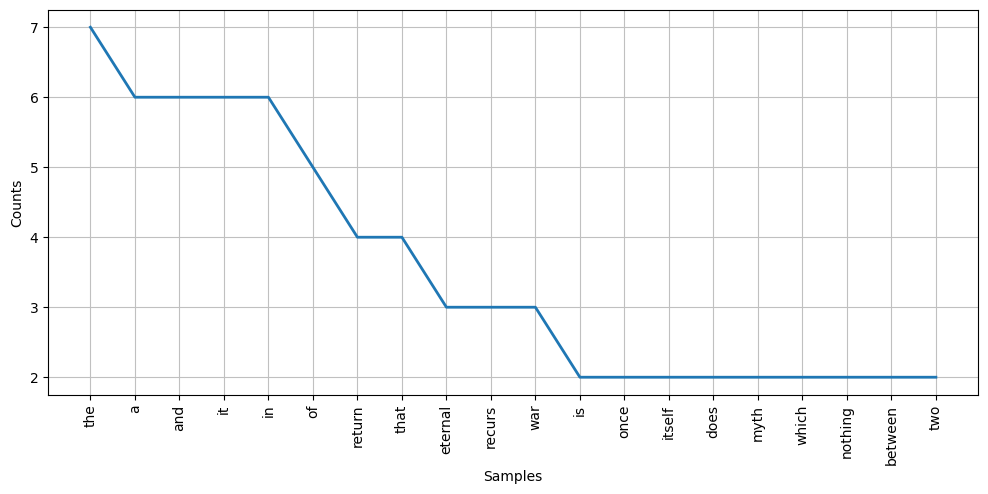

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
from nltk import FreqDist #Además podemos generar un diccionario de frecuencias propio de nltk

fdist1 = FreqDist(tokens_text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))  # the size


fdist1.plot(20, cumulative=False)

As we can see, the most frequent words in the text are generally those with low semantic meaning that we would mostly want to eliminate. This set is called STOPWORDS.

In [12]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jazzname/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jazzname/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
#Eliminate stopwords

filtered_tokens = []


for t in tokens_text:
    t = t.lower()
    if t not in stop_words:
        filtered_tokens.append(t)


filtered_freq = FreqDist(filtered_tokens)

In [14]:
#We order the filtered results using pandas

import pandas as pd

df = pd.DataFrame([[key, filtered_freq[key]] for key in filtered_freq.keys()], columns=['Token', 'Frequency'])

print(df.sort_values(by='Frequency', ascending=False)) # I  print it by sorting it by frequency (inverted).

           Token  Frequency
2         return          4
42           war          3
11        recurs          3
1        eternal          3
43           two          2
17          myth          2
44       african          2
46    fourteenth          2
47       century          2
48       altered          2
45      kingdoms          2
38       nothing          2
41          note          1
37          mean          1
36        beauty          1
40          take          1
35     sublimity          1
34        horror          1
33       sublime          1
39          need          1
0           idea          1
31      horrible          1
49       destiny          1
50         world          1
51          even          1
52       hundred          1
53      thousand          1
54        blacks          1
55      perished          1
56  excruciating          1
32     beautiful          1
29       advance          1
30       whether          1
28          dead          1
3     mysterious    

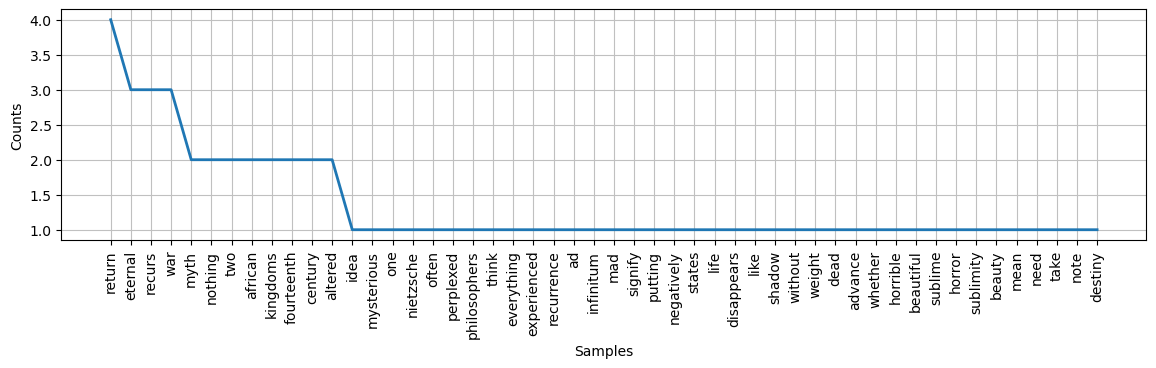

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
#print(tokens_filtrados)
set(filtered_tokens)

plt.figure(figsize=(14, 3))  # the size

fdist2 = FreqDist(filtered_tokens)
fdist2

fdist2.plot(50, cumulative=False)

Now we can create the word cloud using the WordCloud library, which performs tokenization and counting automatically.

In [16]:
#Modify Stop Words of NLTK
remover = {'some', 'a', 'in'} #Write here the words you want to remove from the nltk stopwords list

stop_words_modificadas = set([word for word in stop_words if word not in remover])


In [17]:
! pip install WordCloud #We run this because we are working an conda environment

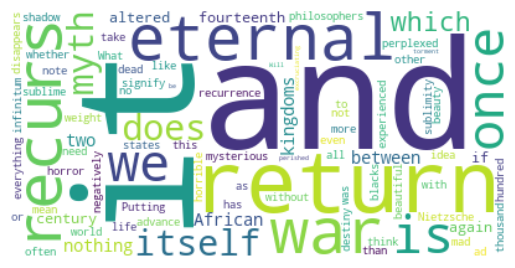

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#stop_words = []
stop_words = ['of','for','The','that','one','in','a'] 



word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Once we have removed the stopwords, our Word Cloud becomes more representative of the text we are working with. Up to this point, we have started with raw text to which we applied different methods to obtain its minimum units (tokens, words, etc).